### Import Necessary Module and Set Path 

In [6]:
import sqlite3 as lite
import os
import sys
import collections
from pyne import nucname
sys.path.insert(0, '../scripts/')
jupyter_directory = os.getcwd()

In [7]:
import analysis as an

## Run Cyclus Input file

In [8]:
! rm cyclus.sqlite
! cyclus eg01-eg29-complex.xml

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

### The output file should be named 
         
          cyclus.sqlite

In [10]:
filename = 'simple.sqlite'
# Wait for the complete message to move on
cur = an.get_cursor(filename)
# get simulation time info
init_year, init_month, duration, timestep = an.get_timesteps(cur)
an.plot_power(cur)
fuel_stuff ={}
sfr_fuel = cur.execute('SELECT time, sum(quantity) FROM transactions '
                       'INNER JOIN resources ON resources.resourceid = '
                       'transactions.resourceid WHERE commodity = "sfr_fuel"'
                       ' GROUP BY time').fetchall()
print(max(an.get_timeseries(sfr_fuel, duration, True)))
fuel_stuff['sfr_fuel'] = an.get_timeseries(sfr_fuel, duration, True)
mox = cur.execute('SELECT time, sum(quantity) FROM transactions '
                       'INNER JOIN resources ON resources.resourceid = '
                       'transactions.resourceid WHERE commodity = "mox"'
                       ' GROUP BY time').fetchall()
# print(max(an.get_timeseries(mox, duration, True)))
fuel_stuff['mox'] = an.get_timeseries(mox, duration, True)
an.multi_line_plot(fuel_stuff, timestep, 'Years', 'Mass[MTHM]', 'Fuel', 'Fuel', init_year)


# get fuel mass timeseries
fuel_dict = an.fuel_usage_timeseries(cur, ['uox', 'mox', 'sfr_fuel'])
an.stacked_bar_chart(fuel_dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'Total Fuel Mass vs Time',
                  'total_fuel',
                  init_year)

# prints net capacity and number of reactor timeseries
power_dict = an.get_power_dict(cur)

ratio = {}
ratio['fr_to_lwr_ratio'] =[x/y for x, y in zip(power_dict['fr_inst'], power_dict['mox_lwr_inst'])]
an.stacked_bar_chart(ratio, timestep, 'Year', 'FR capacity / MOX LWR capacity',
                     'Ratio vs Time', 'ratio', init_year)

# get tailings mass timeseries
agent_ids = an.get_agent_ids(cur, 'enrichment')
tailings = an.facility_commodity_flux(cur, agent_ids,
                                      ['tailings'], True)
an.stacked_bar_chart(tailings, timestep,
                  'Year', 'Mass [MTHM]',
                  'Tailings vs Time',
                  'tailings', init_year)

# natural uranium demand
nat_u = collections.OrderedDict()
nat_u['nat_u'] = an.nat_u_timeseries(cur)
an.stacked_bar_chart(nat_u, timestep,
                     'Years', 'Natural Uranium Mass',
                     'Natural Uranium Demand vs Time',
                     'nat_u', init_year)

# uranium utilization
dictionary = {}
dictionary['uranium_utilization'] = an.u_util_calc(cur)
an.stacked_bar_chart(dictionary, timestep,
                     'Years', 'U Utilization Factor',
                     'U Utilization vs Time',
                     'u_util', init_year)

# get reprocessed material flow
agent_ids = an.get_agent_ids(cur, 'separations')
combined = an.facility_commodity_flux(cur, agent_ids, ['mox_Pu', 'uox_Pu', 'sfr_Pu'], True)
uox_Pu = an.facility_commodity_flux(cur, agent_ids, ['uox_Pu'], True)
mox_Pu = an.facility_commodity_flux(cur, agent_ids, ['mox_Pu'], True)
sfr_Pu = an.facility_commodity_flux(cur, agent_ids, ['sfr_Pu'], True)
an.stacked_bar_chart(combined, timestep, 'Years', 'Mass[MTHM]',
                  'Total reprocessed outflux vs Time', 'combined',
                  init_year)
an.stacked_bar_chart(uox_Pu, timestep, 'Years', 'Mass[MTHM]',
                  'reprocessed from spent UOX vs Time', 'from_spent_uox',
                  init_year)
an.stacked_bar_chart(mox_Pu, timestep, 'Years', 'Mass[MTHM]',
                  'reprocessed from spent MOX vs Time', 'from_spent_mox',
                  init_year)
an.stacked_bar_chart(sfr_Pu, timestep, 'Years', 'Mass[MTHM]',
                  'reprocessed from spent SFR Fuel vs Time', 'from_spent_sfr',
                  init_year)

print('Finished!')

sink_source_facilities has no values
sink_source_facilities has no values
1997.262


/home/teddy/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in double_scalars
../scripts/analysis.py:773: RuntimeWarning: invalid value encountered in true_divide
  u_util_timeseries = np.nan_to_num(fuel_timeseries / u_supply_timeseries)


The Average Fuel Utilization Factor is: 
0.11892439876
Finished!


In [6]:
# Number of Reactors Deployed
cur = an.get_cursor(filename)
lwr = cur.execute('SELECT count(*) FROM agententry '
                  'WHERE prototype = "lwr"').fetchone()
print('The Number of LWRs Deployed:')
print(lwr[0])

mox_lwr = cur.execute('SELECT count(*) FROM agententry '
                  'WHERE prototype = "mox_lwr"').fetchone()
print('The Number of MOX LWRs Deployed:')
print(mox_lwr[0])

sfr = cur.execute('SELECT count(*) FROM agententry '
                  'WHERE prototype = "fr"').fetchone()
print('The Number of FRs Deployed:')
print(sfr[0])

The Number of LWRs Deployed:
265
The Number of MOX LWRs Deployed:
256
The Number of FRs Deployed:
1586


In [7]:
# Fresh and Spent Fuel Composition
cur = an.get_cursor(filename)

sfr_fuel_qualid = cur.execute('SELECT qualid FROM transactions '
                              'INNER JOIN resources ON '
                              'resources.resourceid = transactions.resourceid '
                              'WHERE commodity = "sfr_fuel"').fetchone()
fresh_sfr_mox_comp = cur.execute('SELECT nucid, massfrac FROM compositions '
                                 'WHERE qualid = ' + str(sfr_fuel_qualid[0])).fetchall()
print('Composition for fresh sfr fuel: ')
for isotope in fresh_sfr_mox_comp:
    print(nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %')

print('\n \n')

sfr_waste_comp = cur.execute('SELECT nucid, massfrac FROM recipes '
                             'LEFT OUTER JOIN compositions '
                             'ON recipes.qualid = compositions.qualid '
                             'WHERE recipe = "sfr_waste_recipe"').fetchall()
print('Composition for sfr spent fuel: ')
for isotope in sfr_waste_comp:
    print(nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %')
    


mox_fuel_qualid = cur.execute('SELECT qualid FROM transactions '
                              'INNER JOIN resources ON '
                              'resources.resourceid = transactions.resourceid '
                              'WHERE commodity = "mox"').fetchone()
fresh_mox_comp = cur.execute('SELECT nucid, massfrac FROM compositions '
                             'WHERE qualid = ' + str(sfr_fuel_qualid[0])).fetchall()
print('Composition for fresh mox fuel: ')
for isotope in fresh_mox_comp:
    print(nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %')


mox_waste_comp = cur.execute('SELECT nucid, massfrac FROM recipes '
                             'LEFT OUTER JOIN compositions '
                             'ON recipes.qualid = compositions.qualid '
                             'WHERE recipe = "mox_waste_recipe"').fetchall()
print('Composition for mox spent fuel: ')
for isotope in mox_waste_comp:
    print(nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %')

Composition for fresh sfr fuel: 
U232: 8.775822757062695e-08 %
U233: 1.9428807043285013e-07 %
U234: 0.015084972356861232 %
U235: 0.7037956076480073 %
U236: 0.5007261647040171 %
U238: 91.78039297324482 %
Pu238: 0.1716807904122861 %
Pu239: 3.5726098865321436 %
Pu240: 1.7115074724152468 %
Pu241: 1.0353854686726636 %
Pu242: 0.5087995083651143 %
Pu244: 1.687360254596043e-05 %

 

Composition for sfr spent fuel: 
Cs137: 4.66 %
U238: 86.193 %
Pu239: 9.023 %
Am241: 0.124 %
Composition for fresh mox fuel: 
U232: 8.775822757062695e-08 %
U233: 1.9428807043285013e-07 %
U234: 0.015084972356861232 %
U235: 0.7037956076480073 %
U236: 0.5007261647040171 %
U238: 91.78039297324482 %
Pu238: 0.1716807904122861 %
Pu239: 3.5726098865321436 %
Pu240: 1.7115074724152468 %
Pu241: 1.0353854686726636 %
Pu242: 0.5087995083651143 %
Pu244: 1.687360254596043e-05 %
Composition for mox spent fuel: 
Cs137: 4.03 %
U238: 88.73 %
Pu239: 6.370000000000001 %
Am241: 0.8699999999999999 %


In [106]:
outstring = ''
outstring += 'Initial Year:' + str(init_year) + '\n'
outstring += 'Initial Month:' + str(init_month) + '\n'
outstring += 'Duration in Months:' + str(duration) + '\n'
outstring += 'End Year:' + str(int(init_year + duration/12)) + '\n'

outstring += '\n'

outstring += 'Total Fuel Used: [MTHM]' + '\n'
first = True
for key in fuel_dict:
    outstring += '\t' + key + ': ' + str(max(fuel_dict[key])) + '\n'
    if first:
        total = fuel_dict[key]
        first = False
    else:
        total = [x + y for x, y in zip(total, fuel_dict[key])]
outstring += '\t' + key + ': ' + str(max(total)) + '\n'

outstring += '\n'

outstring += 'Total Natural Uranium [MTHM]' + '\n'
outstring += '\t' + str(max(nat_u['nat_u'])) + '\n'

outstring += 'Total Tailings [MTHM]' + '\n'
outstring += '\t' + str(max(tailings['tailings'])) + '\n'

outstring += '\n'

outstring += 'Average Fuel Utilization Factor (Fuel/NatU):' + '\n'
outstring += '\t' + str(sum(dictionary['uranium_utilization']) / len(dictionary['uranium_utilization'])) + '\n'

outstring += '\n'

outstring += 'Plutonium reprocessed: [MTHM]' + '\n'
first = True
for key in combined:
    outstring += '\t' + key + ': ' + str(max(combined[key])) + '\n'
    if first:
        total = combined[key]
        first = False
    else:
        total = [x + y for x, y in zip(total, combined[key])]
outstring += '\t Total: ' + str(max(total)) + '\n'

outstring += '\n' 

outstring += 'Reactors Deployed:' + '\n'
outstring += '\t LWR: ' + str(lwr[0]) + '\n'
outstring += '\t FR: ' + str(sfr[0]) + '\n'
outstring += '\t MOX_LWR: ' + str(mox_lwr[0]) + '\n'

outstring += '\n'

outstring += 'Compositions' + '\n'
outstring += '\t Composition for fresh sfr fuel: ' + '\n'
for isotope in fresh_sfr_mox_comp:
    outstring += '\t\t ' + nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %' + '\n'
    
outstring += '\t Composition for fresh sfr spent fuel: ' + '\n'
for isotope in sfr_waste_comp:
    outstring += '\t\t' + nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %' + '\n'

outstring += 'Composition for fresh mox fuel: '
for isotope in fresh_mox_comp:
    outstring += '\t\t' + nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %' +'\n'
    
outstring += 'Composition for mox spent fuel: '
for isotope in mox_waste_comp:
    outstring +=  '\t\t' + nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %' + '\n'
    
print(outstring)
if 'simulation_results':
    with open('simulation_results', 'w') as output:
        output.write(outstring)

Initial Year:1959
Initial Month:1
Duration in Months:3024
End Year:2211

Total Fuel Used: [MTHM]
	uox: 422838.77
	mox: 187217.63
	sfr_fuel: 578248.0
	sfr_fuel: 1188304.4

Total Natural Uranium [MTHM]
	3835973.67025
Total Tailings [MTHM]
	64444.16

Average Fuel Utilization Factor (Fuel/NatU):
	0.130860538474

Plutonium reprocessed: [MTHM]
	mox_Pu: 9277.63584839
	uox_Pu: 4920.71647712
	sfr_Pu: 46355.2000475
	 Total: 60553.552373

Reactors Deployed:
	 LWR: 265
	 FR: 1586
	 MOX_LWR: 256

Compositions
	 Composition for fresh sfr fuel: 
		 U232: 8.775822757062695e-08 %
		 U233: 1.9428807043285013e-07 %
		 U234: 0.015084972356861232 %
		 U235: 0.7037956076480073 %
		 U236: 0.5007261647040171 %
		 U238: 91.78039297324482 %
		 Pu238: 0.1716807904122861 %
		 Pu239: 3.5726098865321436 %
		 Pu240: 1.7115074724152468 %
		 Pu241: 1.0353854686726636 %
		 Pu242: 0.5087995083651143 %
		 Pu244: 1.687360254596043e-05 %
	 Composition for fresh sfr spent fuel: 
		Cs137: 4.66 %
		U238: 86.193 %
		Pu239: 9.0

### Plots

In [ ]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')


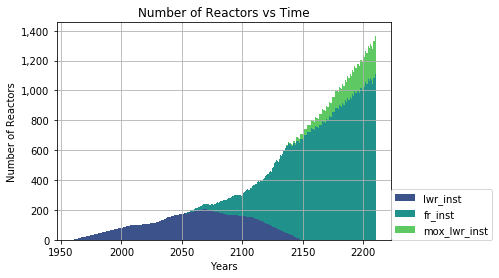

In [9]:

# Display Number of Reactors vs Time
from IPython.display import Image
Image(filename='num_plot.png')


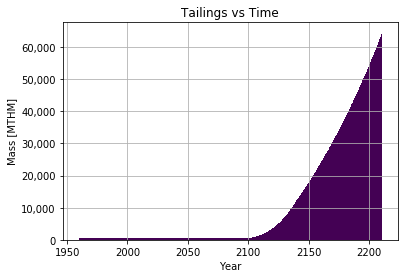

In [10]:

# Display Tailings vs Time
from IPython.display import Image
Image(filename='tailings.png')


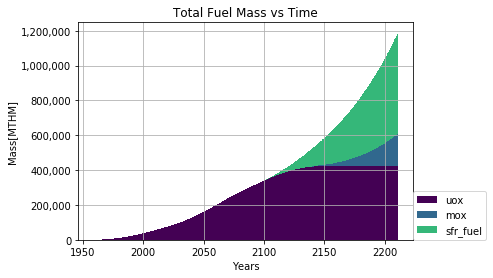

In [11]:

# Display Total Fuel vs Time
from IPython.display import Image
Image(filename='total_fuel.png')


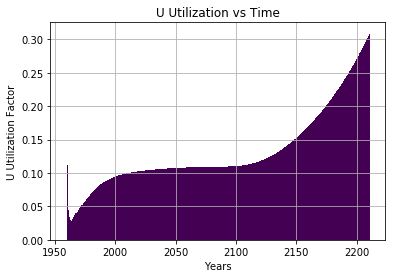

In [12]:

# Display Uranium Utilization vs Time
from IPython.display import Image
Image(filename='u_util.png')


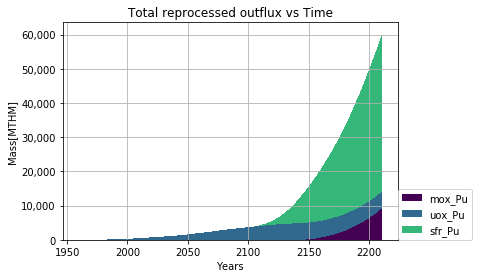

In [13]:

# Display Separated Pu Flow
from IPython.display import Image
Image(filename='combined.png')


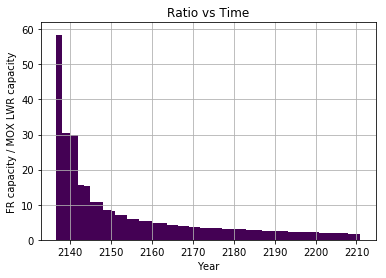

In [17]:

from IPython.display import Image
Image(filename='ratio.png')


In [ ]:

from IPython.display import Image
Image(filename='.png')